# Investment returns, portfolios, and indexes

William Mann

Emory University

![alt](https://github.com/wgjm1986/Investments/blob/main/Module%201/Week%201%20-%20Investment%20returns,%20portfolios,%20indexes/Emory_small.png?raw=true)

## Motivation

What's a "typical" stock return?

Here I want to give a little motivation for why we need to study this topic. It should be included in the PDF but not in the slides.

Look, I made some changes.

Look, I made some more changes.

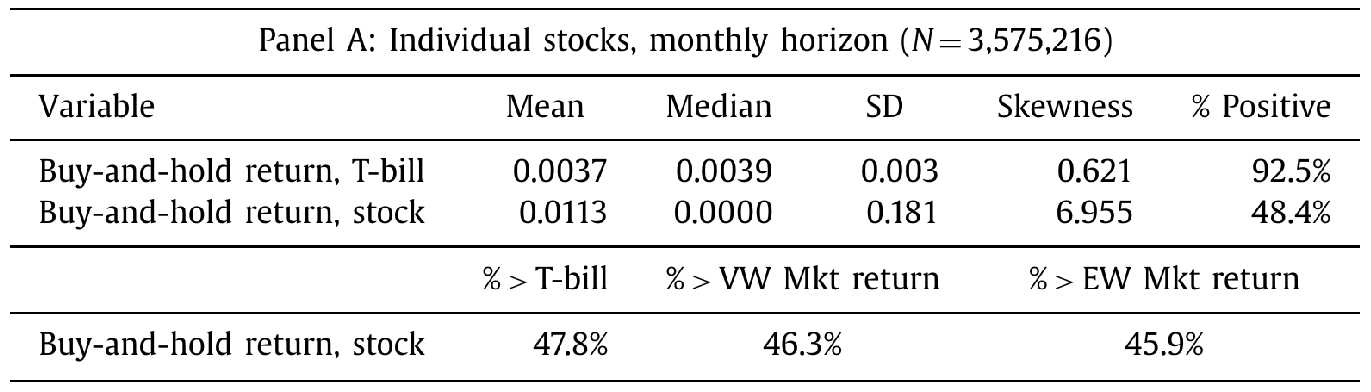

## Overview

To say anything useful about investment performance, we really need to study large portfolios, not individual securities.

So to start, we will discuss how portfolios are built and maintained.

This week, we will consider a few specific investment strategies: price weighting, equal weighting, and value weighting.

In each case, using some example data, we will ask:

- How to form a portfolio reflecting that strategy?
- How to compute the return on that portfolio?
- How to rebalance the portfolio to stay in line with the strategy?
- What is the connection with the return on an index?

## Takeaways

We will see that the answers to the previous questions depend on:

- The price change of each security in the portfolio,
- The payout of each security (dividends, coupons, etc),
- Changes in the total supply of each investment (for example, stock splits, stock dividends, repurchases).

We will also see why value-weighting is a natural benchmark strategy.

Homework 1 builds on these examples.

## Building and rebalancing a portfolio

A portfolio is just a collection of securities. To build one:

- Decide on the list of securities you want to include.
- Choose a strategy for how much to allocate to each one.
- Calculate the amounts you need to buy at current market prices.

After building a portfolio, you might also want to rebalance regularly, in order to stay in line with the strategy you chose above:

- Recalculate the portfolio that now aligns with your strategy.
- Buy or sell enough of each security to arrive at this portfolio.

## Keeping track of trading activity during rebalancing

Different strategies require different amounts of trading to rebalance.
It is important to track this activity because trading is costly.

- Turnover is gross trading activity during any window of time, as a percent of the portfolio size at the start of the window.

    - To be clear, the exact trading costs are still only a fraction of this amount, and depend greatly on who is doing the trading.

- Gross trading activity is total purchases plus total sales. 

    - We add them together because both are costly.

- For comparison, net trading activity is purchases minus sales.

    - This does not measure trading costs, but still can be useful: It must equal the total amount added or withdrawn from the portfolio, plus reinvestment of dividends or coupons.

## Measuring portfolio returns

The return on a portfolio between two dates can be calculated as:

- The ending value of securities owned and dividends received, divided by the initial value of the securities, minus 1;

- or, the weighted average return of each individual security, being sure to include the dividends that they paid, where the weights are the portfolio’s initial dollar allocations.

Either method will give the same answer.

## Example 1: Textbook table 2.2, page 46

| Stock | Initial price | Final price | Shares (m) | Initial market cap (\$m) | Final market cap (\$m) |
|-------|---------------|-------------|------------|--------------------------|------------------------|
| ABC   | \$25          | \$30        | 20         | \$500                    | \$600                  |
| XYZ   | \$100         | \$90        | 1          | \$100                    | \$90                   |

## Example 2: Data on AMGN and GILD from 2017

| Stock | Initial price | Final price | Initial shares (m) | Final shares (m) | Dividends paid per share, \$ |
|-------|---------------|-------------|--------------------|------------------|------------------------------|
| AMGN  | \$146.21      | \$173.90    | 738.2              | 722.2            | \$4.60                       |
| GILD  | \$71.61       | \$71.64     | 1310               | 1308             | \$2.08                       |

## Importance of the value-weighted portfolio

For many people, a value-weighted portfolio seems like the *least* natural of the strategies that we have looked at. Nevertheless, it is always the benchmark.

- It represents a proportional slice of the overall market, which means it is the only strategy that everyone can hold.
- Therefore, it also requires the least rebalancing of any strategy. “Passive” investing always means value-weighted investing.
- It is *guaranteed* to match the average return across all investors. Any performance you gain or lose using a different portfolio, is matched by the rest of the market in the opposite direction.
- Although it weights *companies* very unevenly, it diversifies equally across dollars of expected future profits.

In [1]:
# Import packages and data

# Initiate WRDS connection
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import wrds
import fredapi
import math
import statsmodels.formula.api
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16.0, 8.0]
from statistics import median
from scipy.stats import skew

# Connect to WRDS database
conn = wrds.Connection(wrds_username='wmann')

Loading library list...
Done


In [2]:
# S&P 500 index returns
SP500 = conn.raw_sql("select caldt, spindx, vwretd, vwretx from crsp_a_indexes.msp500")
SP500['month'] = pd.to_datetime(SP500['caldt']).dt.to_period('M')
SP500 = SP500.drop(columns=['caldt']).set_index(['month'])
SP500 = SP500['1993-08':]

## 30-year return on a value-weighted portfolio

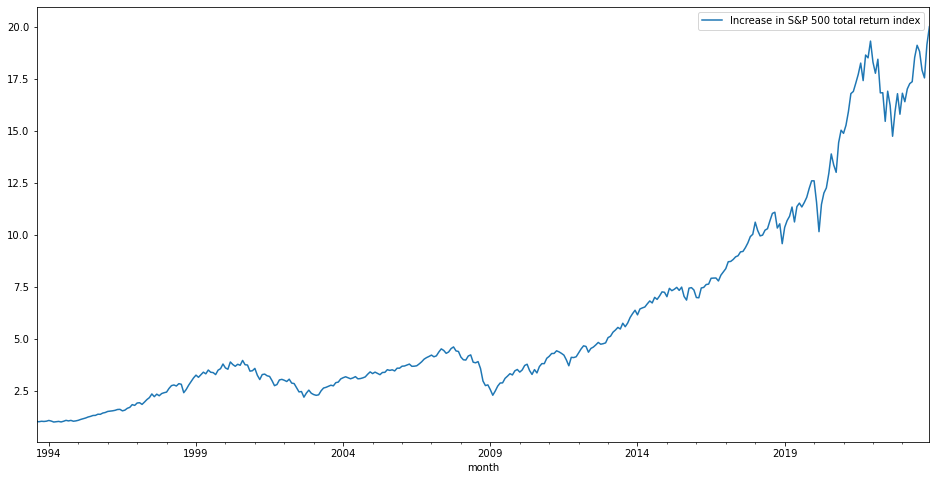

In [3]:
(1+SP500.vwretd).cumprod().plot(label="Increase in S&P 500 total return index",legend=True);

## Histogram of monthly returns on that portfolio.

The distribution is roughly symmetric, which is very different than the pattern for individual stocks as documented in the Bessembinder paper.

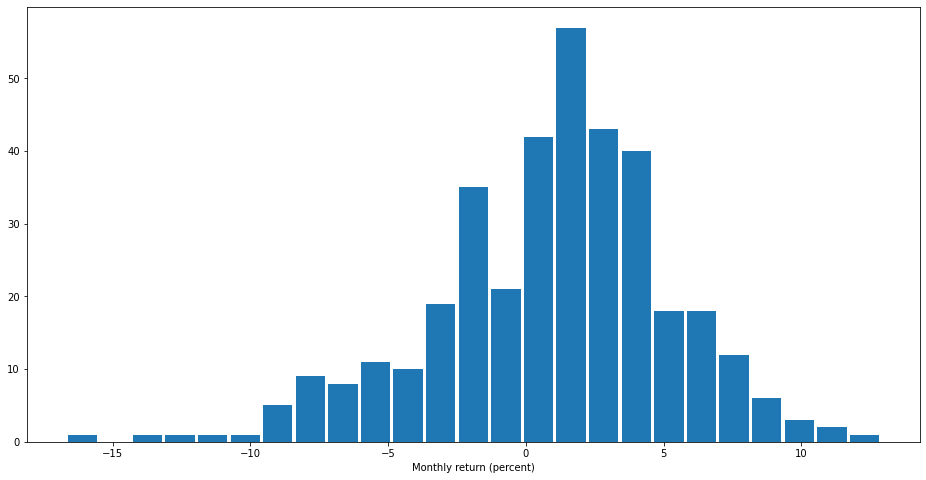

In [4]:
plt.hist(100*SP500.vwretd,bins=25,rwidth=0.9);
plt.xlabel("Monthly return (percent)")
plt.savefig("SP500_histogram.png",dpi=300)

## Indexes of investment performance

An index helps track the performance of a given strategy/portfolio.

Examples:

- DJIA: price-weighted portfolio of stocks.
- S&P 500 index: value-weighted portfolio of stocks.
- Bloomberg Agg (fka Barclay’s Agg): value-weighted, bonds.

Each index features a list of investments, and a weighting scheme.

The level of the index by itself is a meaningless, arbitrary number.

Index *changes* are connected to returns on the underlying strategy.
But the exact connection depends on how the index is constructed.

## S&P 500 index calculation

Most US stock indexes are designed to measure returns to their
underlying strategy from capital gains alone, *excluding dividends.*

For example, the S&P 500 index is calculated with this formula:

$$
\text{S&P 500 index level} = \frac{ \sum P \times Q }{ \text{Divisor} }
$$

The divisor is adjusted in response to events that change market cap
without triggering a capital gain for the individual investor, such as
share issuance or repurchase. (We will do an example of this.)

So the index return *does not* include the return from dividends.
There is an S&P 500 “total return” index, but it is not as well-known.

It doesn’t have to be this way! The DAX is a total return index.

## Comparison of S&P 500 index and S&P 500 total return index

Dividends are important, especially over long horizons!

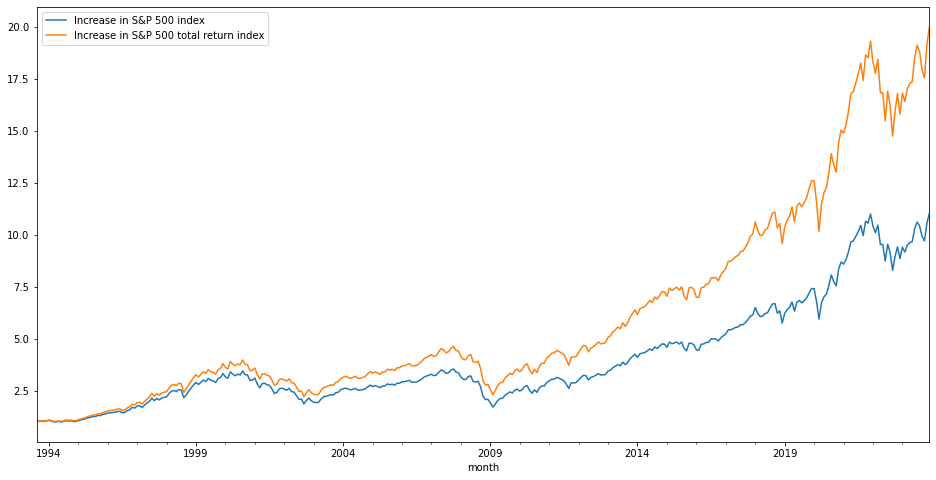

In [5]:
(1+SP500.vwretx).cumprod().plot(label="Increase in S&P 500 index",legend=True);
(1+SP500.vwretd).cumprod().plot(label="Increase in S&P 500 total return index",legend=True);

## The Agg: Bloomberg/Barclays aggregate bond index

- The best-known US bond market index. The formal name has
changed several times. It is generally just called the “Agg.”

- It reflects a value-weighted portfolio of a broad range of
fixed-income securities. Like most bond indexes, it is a “total
return” index, meaning it does include coupon reinvestment.

- But unlike stocks, it is not obvious which securities to include.
Currently it’s mostly Treasuries, MBS, and IG corporate.
But this is always a source of debate and controversy.
For example, some argue for adding munis and junk bonds.

- It’s also not obvious if the portfolio represented by this strategy
is really the correct benchmark for investors to use.

- Many basic questions remain open about portfolio management
and performance assessment with fixed income.

## Agg index components

![MyImage](
https://github.com/wgjm1986/Investments/blob/main/Module%201/Week%201%20-%20Investment%20returns,%20portfolios,%20indexes/agg_components_small.png?raw=True)

## Agg index historical performance
[source](https://advisors.vanguard.com/insights/article/Unpackthechallengesofrisingbondfundyields)

![MyImage](https://github.com/wgjm1986/Investments/blob/main/Module%201/Week%201%20-%20Investment%20returns,%20portfolios,%20indexes/agg_performance.png?raw=True)

In the figure above, the blue line is shaped identically to the prior figure, the only difference is that the vertical axis is now in units of "total proportional increase since the beginning of the chart" (with the beginning scaled to 1), rather than in the units of the S&P 500 index itself (which are meaningless on their own). 
As we discussed in class, the blue line can be interpreted as the *capital gains* that you would have gotten on each dollar invested at the beginning of the harge (ignoring transaction costs and taxes), if you invested that dollar in a value-weighted portfolio of S&P 500 stocks during this time. 

As we also discussed, it is somewhat odd to focus only on capital gains and ignore the dividends that you also would have received. The S&P 500 total return index is calculated to address this issue. It tracks the *total return* from the value-weighted portfolio described above. That is, if you invested $\$1$ at the beginning of the figure, and rebalanced it throughout the dates shown, *including reinvesting any dividends* back into the same strategy, then the orange line tracks the total value through each date of the $\$1$ you initially invested. By the end of the figure, your $\$1$ would have grown to about $\$17.50$. This is really the correct way to think about the "benchmark" performance of a passive investment strategy.

What if you did not reinvest the dividends back into the same strategy, but did something else with them? Suppose for example you put the dividends into a cash account, but allowed capital gains to continue to accrue in your stock portfolio. The growth of this "strategy" over time would lie somewhere between the two lines. So importantly, the blue line is still *not* the correct measure of this strategy's performance. 

Instead, the blue line would corresponds to a behavior in which you completely consume exactly the dividends that are paid at every date, no less and no more. Of course, you very well may want to subtract some cash out of your portfolio during the horizon shown in the figure, but it's very unlikely that this subtraction will exactly match whatever dividends the portfolio companies happen to pay. Instead we think of this as a separate decision to be modeled separately (see Module 2). 


Our goal here is to understand the performance of the funds that you *do* leave invested. And so the most natural thing is to imagine that any such funds (including dividends that you did not want to cash out) are reinvested back into the strategy. Again, this corresponds with the orange line, not the blue line.

The paper that we looked at in class (Bessembinder, 2018) documented that the distribution of *individual* monthly stock returns is extremely skewed, with a mean of over 1% but a median of roughly zero. Here we will show in various ways that the distribution of the *value weighted portfolio* of monthly stock returns is much better behaved. 

There are some important differences between this analysis and his paper: We are considering only S&P 500 stocks, not the universe of all listed stocks, and we are considering only the last 30 years, not 1926-2016 as he did. But the overall message does not depend on these things.

The mean and median are not exactly the same, but the median is positive, in fact it is above the mean. This reflects the fact that at the *portfolio* level, the returns of the very worst months are larger than the returns of the very best months. For example the highest one-month return ever in this period was 13% in April 2020, which was still barely enough to offset the prior month (-12% in March 2020), and the market has dropped by even more than this on two separate occasions (-14% in August 1998, -17% in October 2008).

In [6]:
print("Average arithmetic monthly S&P 500 total return: " + '%4.2f' % (100*SP500.vwretd.mean()) + "%" )

Average arithmetic monthly S&P 500 total return: 0.92%


In [7]:
print("Median monthly return: " + '%4.2f' % (100*median(SP500.vwretd)) +"%")

Median monthly return: 1.44%


Consistent with the median being above the mean, the skewness of the overall portfolio return is negative. But the important thing is that it is also economically much smaller than the value of over 6 that Bessembinder documented for individual stocks.

In [8]:
print("Skewness of monthly return: " + '%4.2f' % skew(SP500.vwretd))

Skewness of monthly return: -0.57


Conclusion: It is much easier to talk about the "typical performance" of a value-weighted *portfolio* of stocks, than of individual stocks. And indeed this portfolio is what individuals mostly hold.

So we will think of a broad value-weighted portfolio as our benchmark, and whenever possible we will analyze strategies that are also broad portfolios, though formed in different ways (one example we have already seen is equal-weighting as opposed to value-weighting).

Since we have the data open, here is a preview of some calculations we will perform in future weeks:

Cumulative value of $1 invested:

In [9]:
SP500_cumulative = (1+SP500.vwretd).cumprod()[-1]
print("Cumulative value of $1 invested in S&P 500: $" + '%4.2f' % SP500_cumulative )

Cumulative value of $1 invested in S&P 500: $20.00


Geometric average return: Notice that it is less than the (arithmetic) average we calculated above. This reflects the impact of "volatility drag" as we will discuss in class.

In [10]:
N = len(SP500.vwretd)

SP500_geometric = SP500_cumulative**(1/N) - 1
print("Geometric average monthly return on S&P 500: " + '%4.3f' % (100*SP500_geometric) + "%")

Geometric average monthly return on S&P 500: 0.824%


Compare with an approximation formula $\mu - \frac{1}{2}\sigma^2$ that we will use later in class:

In [11]:
print("Approximation to geometric average: " + '%4.3f' % (100*(SP500.vwretd.mean() - 0.5*SP500.vwretd.std()**2)) + "%")

Approximation to geometric average: 0.825%
